In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from ctext import *
setapikey("demo")


import bs4 as bs
import urllib.request
corp={}
for x in range(0, 11):
    sauce = urllib.request.urlopen('https://www.kanripo.org/text/KR3a0001/00%d' % (x)).read()
    soup = bs.BeautifulSoup(sauce, 'lxml')

    corp[x] = ""
    for paragraph in soup.find_all('p'):
        corp[x]+=paragraph.text


frequency=[]
chapter_list=[]

for i in corp:
    match_count = {} 
    for match in re.finditer(r"子路", corp[i]):
        matched_text = match.group(0) 
        if not matched_text in match_count:
            match_count[matched_text] = 0 
        match_count[matched_text] = match_count[matched_text] + 1
    frequency.append(str(match_count.values()))
    chapter_list.append(int(i))


d = {'Chapter': chapter_list, 'Frequency': frequency}
df = pd.DataFrame(data=d)
df['Frequency'] = df['Frequency'].map(lambda x: x.lstrip('dict_values([').rstrip('])'))
df.index = np.arange(1, len(df)+1)
df.replace('', 0, inplace=True)
df['Frequency'] = df['Frequency'].astype(int)

df

,Chapter,Frequency
1,0,1
2,1,0
3,2,25
4,3,6
5,4,4
6,5,20
7,6,0
8,7,4
9,8,6
10,9,3


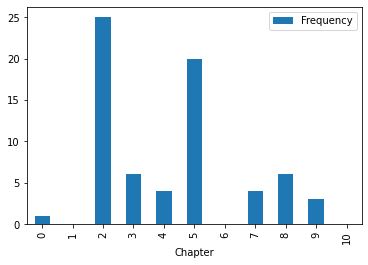

In [10]:
df.plot(x="Chapter", y="Frequency", kind='bar');